**Houses USA**

Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [2]:
!pwd

/Users/vanessalieberg/code/Megeve2022/housing_usa/notebooks


In [3]:
df = pd.read_csv("../raw_data/kc_house_data 2.csv", parse_dates=['date'])

# Dataset Overview

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Dataset cleaning

In [6]:
df.duplicated().sum()

0

In [7]:
df['id'].duplicated().sum()

177

In [8]:
missing_col = df.isnull().sum().sort_values(ascending=False)
missing_col

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [9]:
# Analysis of nan
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Dataset pre-analysis

In [10]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

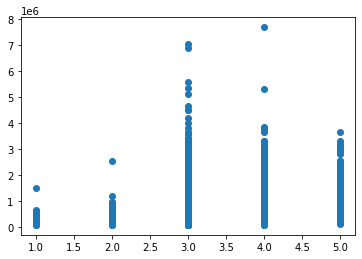

In [11]:
plt.scatter(x=df['condition'], y=df['price'])

In [12]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [13]:
df[df['id']==7129300520]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [14]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [15]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:>

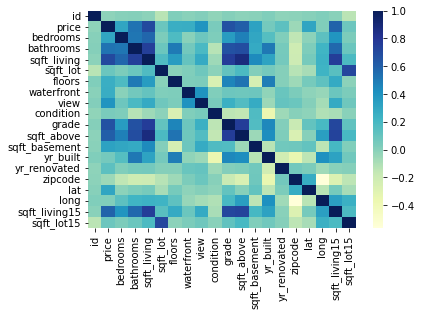

In [16]:
corr = df.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

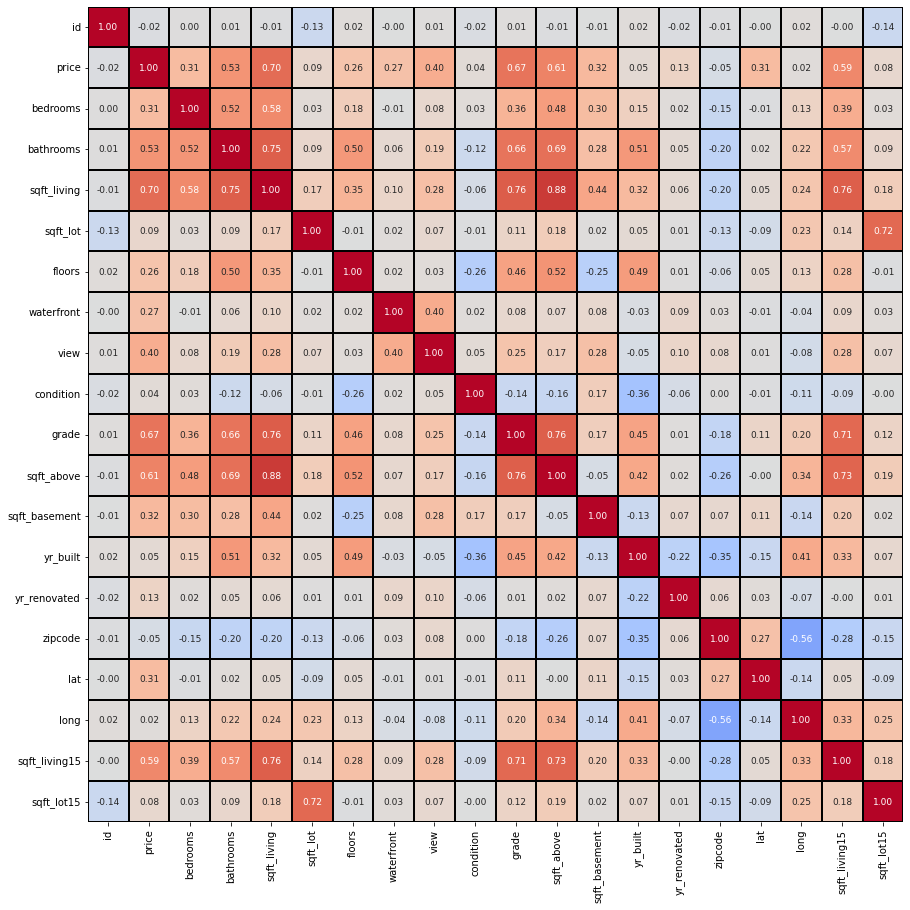

In [17]:
fig, ax = plt.subplots(figsize = (15, 15))
# Heatmap
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, fmt = ".2f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "black", cbar = False)

sns.despine(top = True, right = True, left = True, bottom = True)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

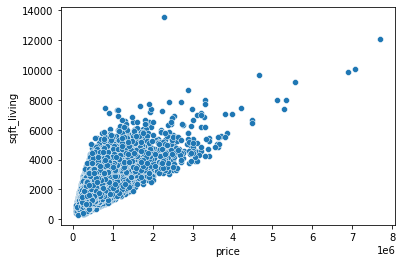

In [18]:
sns.scatterplot(x = df['price'], y= df['sqft_living'])

👇 Visualize the correlation between column pairs in a dataframe.

In [19]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
224,sqft_above,sqft_living,0.876597
91,sqft_living,sqft_above,0.876597
204,grade,sqft_living,0.762704
90,sqft_living,grade,0.762704
98,sqft_living,sqft_living15,0.756420


❓ How many pairs of features exceed a correlation of 0.9 or -0.9? Save your answer as an integer under variable name `correlated_features`

In [20]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])
correlated_features

0

# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [21]:
X = df.drop(columns=['price','id','date'])
y = df['price']

In [22]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.695187524773045

# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [24]:

from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=300) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
8,grade,0.188523
2,sqft_living,0.152883
14,lat,0.103562
11,yr_built,0.087732
9,sqft_above,0.05109
5,waterfront,0.037728
6,view,0.024305
0,bedrooms,0.01644
1,bathrooms,0.014929
13,zipcode,0.014398


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [25]:
X = X.drop(columns=['floors','sqft_lot','yr_renovated','sqft_lot15','sqft_living15']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

0.6947411783581784

In [26]:

df1= df[['price','bedrooms','zipcode']].sort_values(by='price', ascending=False)

df1.head(15)



,price,bedrooms,zipcode
7252,7700000.0,6,98102
3914,7062500.0,5,98004
9254,6885000.0,6,98039
4411,5570000.0,5,98039
1448,5350000.0,5,98004
1315,5300000.0,6,98040
1164,5110800.0,5,98033
8092,4668000.0,5,98040
2626,4500000.0,5,98155
8638,4489000.0,4,98004


# Multivariate Linear Regression (with statsmodel)

In [27]:
import statsmodels.api as sm

In [28]:
import statsmodels.formula.api as smf


#model1: an ols regression of review_score over wait_time
model1 = smf.ols(formula = 'price ~ grade', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:37:28   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.056e+06   1.23e+04    -86.166      0.000   -1.08e+06   -1.03e+06
grade       2.085e+05   1582.103    131.760      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    19920.375   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2053087.758
Skew:                           4.090   Prob(JB):                         0.00
Kurtosis:                      50.042   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
features_test = df.columns.to_list()
features_test

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [30]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [32]:
formula = "price ~ " + ' + '.join(features)
formula

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15'

## Normalization of the features

In [33]:
orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,...,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
1,6414100192,2014-12-09,538000.0,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,...,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863
2,5631500400,2015-02-25,180000.0,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,...,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371
3,2487200875,2014-12-09,604000.0,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,...,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
4,1954400510,2015-02-18,510000.0,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,...,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.087171,-0.305752,...,0.291909,-0.312032,-0.658666,1.293512,-0.210124,0.468371,1.004935,-0.938047,-0.666119,-0.412371
21609,6600060120,2015-02-23,400000.0,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.087171,-0.305752,...,0.291909,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.356172,-1.051660,-0.228413,-0.203942
21610,1523300141,2014-06-23,402101.0,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.087171,-0.305752,...,-0.558823,-0.927906,-0.658666,1.293512,-0.210124,1.234654,0.247882,-0.604307,-1.410220,-0.394132
21611,291310100,2015-01-16,400000.0,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.087171,-0.305752,...,0.291909,-0.227500,-0.658666,1.123290,-0.210124,-0.952056,-0.184410,1.028887,-0.841202,-0.420502


In [34]:
model_OS = smf.ols(formula = formula, data = orders_standardized).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:37:28   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.404e+05   1396.644    386.918

In [35]:
features_OS = ['bedrooms', 'bathrooms',
               'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
               'yr_built', 'yr_renovated', 'zipcode',
               'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [36]:
formula_OS = "price ~ " + ' + '.join(features_OS)
formula_OS

'price ~ bedrooms + bathrooms + sqft_lot + floors + waterfront + view + condition + grade + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15'

In [37]:
model_OS = smf.ols(formula = formula_OS, data = orders_standardized).fit()
print(model_OS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2831.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:37:29   Log-Likelihood:            -2.9586e+05
No. Observations:               21613   AIC:                         5.917e+05
Df Residuals:                   21597   BIC:                         5.919e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.401e+05   1450.538    372.336

# Multivatiable Linear Regression model

In [38]:
model_A = smf.ols(formula = formula, data = df).fit()
print(model_A.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:37:29   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282

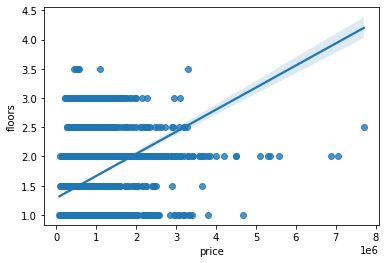

In [39]:
sns.regplot(x='price', y='floors', data=df);

Removing floors from the analysis, as p>0.05

In [40]:
features_B = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [41]:
formula_B = "price ~ " + ' + '.join(features_B)
formula_B

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15'

In [42]:
model_B = smf.ols(formula = formula_B, data = df).fit()
print(model_B.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:37:34   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.741e+06   2.89e+06      1.989

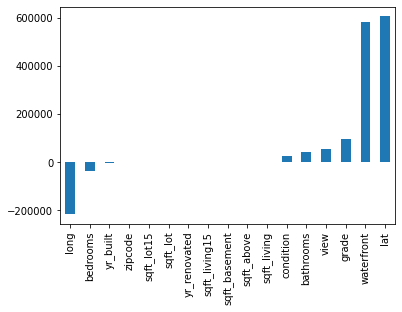

In [43]:
model_B.params[1:].sort_values().plot(kind='bar');

In [44]:
predicted_review_score = model_B.predict(df[features_B])

In [45]:
residuals = predicted_review_score - df.price

In [46]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

201180.02121695896